In [ ]:
import pandas
import PIL
import os
import numpy as np
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from IPython.display import display, Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_dir = "/content/drive/My Drive/uc_merced_land_use/images_train_test_val"

In [ ]:
import os

model_path = '/content/drive/My Drive/uc_merced_land_use/Models/CNN_Model_V1.h5'

if os.path.exists(model_path):
  print(f"File found at: {model_path}")
  model = load_model(model_path, compile=False)
  model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
else:
  print(f"File not found at: {model_path}")
  print("Please check the file path and ensure the file exists.")

File found at: /content/drive/My Drive/uc_merced_land_use/Models/CNN_Model_V1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
counts = {
    'train': {},
    'test': {},
    'validation': {}
}

def count_images_in_directory(directory):
    label_counts = {}
    total_count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            image_count = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            label_counts[label] = image_count
            total_count += image_count
    return label_counts, total_count

for folder in ['train', 'test', 'validation']:
    folder_path = os.path.join(root_dir, folder)
    counts[folder]['label_counts'], counts[folder]['total_count'] = count_images_in_directory(folder_path)

for folder in ['train', 'test', 'validation']:
    print(f"Folder: {folder}")
    print(f"Total images: {counts[folder]['total_count']}")
    print("Images per label:")
    for label, count in counts[folder]['label_counts'].items():
        print(f"  {label}: {count}")
    print()

Folder: train
Total images: 7360
Images per label:
  mobilehomepark: 350
  river: 360
  overpass: 350
  tenniscourt: 350
  mediumresidential: 350
  sparseresidential: 350
  storagetanks: 350
  runway: 350
  parkinglot: 350
  chaparral: 350
  baseballdiamond: 350
  freeway: 350
  harbor: 350
  buildings: 350
  forest: 350
  intersection: 350
  golfcourse: 350
  denseresidential: 350
  beach: 350
  airplane: 350
  agricultural: 350

Folder: test
Total images: 1050
Images per label:
  mobilehomepark: 50
  parkinglot: 50
  overpass: 50
  runway: 50
  storagetanks: 50
  river: 50
  tenniscourt: 50
  sparseresidential: 50
  beach: 50
  freeway: 50
  forest: 50
  intersection: 50
  golfcourse: 50
  chaparral: 50
  buildings: 50
  mediumresidential: 50
  denseresidential: 50
  harbor: 50
  agricultural: 50
  baseballdiamond: 50
  airplane: 50

Folder: validation
Total images: 2107
Images per label:
  river: 100
  mobilehomepark: 100
  sparseresidential: 100
  parkinglot: 100
  tenniscourt: 100

In [ ]:
test_dir = root_dir+'/test'
test_datagen = ImageDataGenerator()

batch_size = 32

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=batch_size, class_mode='sparse')


Found 1050 images belonging to 21 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class_labels = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings',
                'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse',
                'harbor', 'intersection', 'mediumresidential', 'mobilehomepark',
                'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential',
                'storagetanks', 'tenniscourt']

y_true = test_generator.classes  # True labels from the generator
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) # Get predicted class labels

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 210s 7s/step


In [ ]:
misclassified_indices = np.where(y_true != y_pred_classes)[0]

In [ ]:

#Top-5 Error Rate
top_5_error_count = 0
total_samples = len(y_true)

for i in range(total_samples):
    top_5_predictions = np.argsort(y_pred[i])[-5:]
    if y_true[i] not in top_5_predictions:
        top_5_error_count += 1

top_5_error_rate = (top_5_error_count / total_samples) * 100

print(f"Top-5 Error Rate: {top_5_error_rate:.2f}%")

Top-5 Error Rate: 76.19%


In [ ]:
def predict_land_all(img_path):
  img = image.load_img(img_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_array)[0]

  class_labels = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings',
                  'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse',
                  'harbor', 'intersection', 'mediumresidential', 'mobilehomepark',
                  'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential',
                  'storagetanks', 'tenniscourt']


  sorted_indices = np.argsort(prediction)[::-1]
  sorted_labels = [class_labels[i] for i in sorted_indices]
  sorted_confidences = prediction[sorted_indices]

  predicted_class_index = np.argmax(prediction)
  predicted_class = class_labels[predicted_class_index]
  print(f"Predicted class: {predicted_class}, Confidence: {prediction[predicted_class_index]:.4f}")

  print("\nAll Class Labels with Confidences (Descending Order):")
  for label, confidence in zip(sorted_labels, sorted_confidences):
      print(f"{label}: {confidence:.4f}")

  plt.imshow(img)
  plt.axis('off')
  plt.title(f'Predicted class: {predicted_class}')
  plt.show()

In [ ]:
import random
import os

def get_random_image(test_dir):

    label = random.choice(os.listdir(test_dir))

    image_dir = os.path.join(test_dir, label)
    image_file = random.choice(os.listdir(image_dir))

    image_path = os.path.join(image_dir, image_file)

    return image_path, label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Predicted class: agricultural, Confidence: 0.9948

All Class Labels with Confidences (Descending Order):
agricultural: 0.9948
forest: 0.0035
beach: 0.0007
freeway: 0.0004
chaparral: 0.0004
river: 0.0001
golfcourse: 0.0001
runway: 0.0000
baseballdiamond: 0.0000
tenniscourt: 0.0000
storagetanks: 0.0000
sparseresidential: 0.0000
overpass: 0.0000
intersection: 0.0000
denseresidential: 0.0000
buildings: 0.0000
mediumresidential: 0.0000
harbor: 0.0000
mobilehomepark: 0.0000
airplane: 0.0000
parkinglot: 0.0000


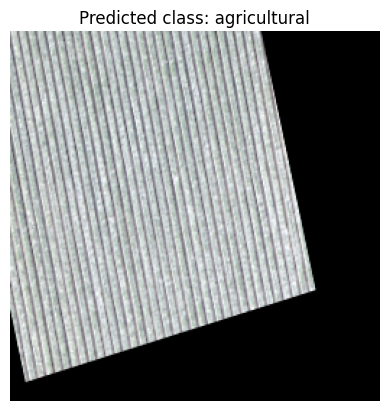

In [ ]:
image_path = root_dir +'/test/agricultural/agricultural_000007.png'
predict_land_all(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: tenniscourt, Confidence: 1.0000

All Class Labels with Confidences (Descending Order):
tenniscourt: 1.0000
baseballdiamond: 0.0000
sparseresidential: 0.0000
mediumresidential: 0.0000
overpass: 0.0000
storagetanks: 0.0000
intersection: 0.0000
denseresidential: 0.0000
freeway: 0.0000
golfcourse: 0.0000
runway: 0.0000
river: 0.0000
buildings: 0.0000
forest: 0.0000
beach: 0.0000
agricultural: 0.0000
airplane: 0.0000
mobilehomepark: 0.0000
parkinglot: 0.0000
chaparral: 0.0000
harbor: 0.0000


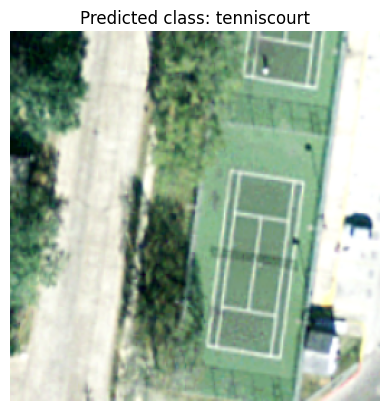

In [ ]:
image_path = root_dir +'/test/tenniscourt/tenniscourt_000014.png'
predict_land_all(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted class: buildings, Confidence: 0.4312

All Class Labels with Confidences (Descending Order):
buildings: 0.4312
denseresidential: 0.3469
storagetanks: 0.0894
mediumresidential: 0.0591
mobilehomepark: 0.0294
tenniscourt: 0.0240
sparseresidential: 0.0070
airplane: 0.0054
intersection: 0.0050
overpass: 0.0016
parkinglot: 0.0004
harbor: 0.0003
freeway: 0.0001
golfcourse: 0.0001
baseballdiamond: 0.0000
runway: 0.0000
chaparral: 0.0000
river: 0.0000
forest: 0.0000
agricultural: 0.0000
beach: 0.0000


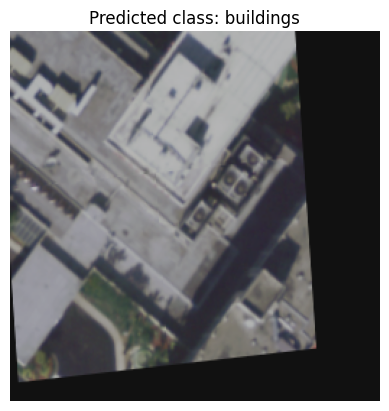

In [ ]:
image_path=root_dir+'/test/buildings/buildings_000283.png'
predict_land_all(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted class: storagetanks, Confidence: 0.7769

All Class Labels with Confidences (Descending Order):
storagetanks: 0.7769
buildings: 0.2159
airplane: 0.0051
overpass: 0.0018
tenniscourt: 0.0001
denseresidential: 0.0001
intersection: 0.0000
freeway: 0.0000
runway: 0.0000
mobilehomepark: 0.0000
golfcourse: 0.0000
sparseresidential: 0.0000
mediumresidential: 0.0000
harbor: 0.0000
baseballdiamond: 0.0000
beach: 0.0000
river: 0.0000
agricultural: 0.0000
parkinglot: 0.0000
chaparral: 0.0000
forest: 0.0000


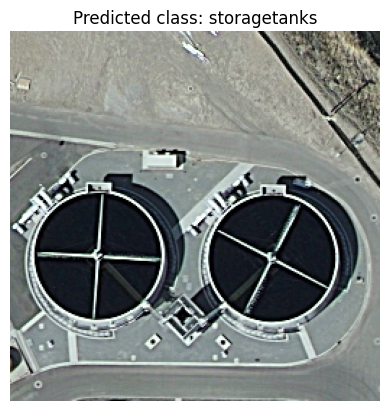

In [ ]:
image_path=root_dir+'/test/storagetanks/storagetanks_000201.png'
predict_land_all(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted class: runway, Confidence: 0.8288

All Class Labels with Confidences (Descending Order):
runway: 0.8288
overpass: 0.1036
intersection: 0.0205
storagetanks: 0.0154
airplane: 0.0125
freeway: 0.0090
buildings: 0.0032
river: 0.0022
tenniscourt: 0.0016
beach: 0.0014
agricultural: 0.0008
golfcourse: 0.0007
baseballdiamond: 0.0003
harbor: 0.0002
denseresidential: 0.0001
sparseresidential: 0.0000
mediumresidential: 0.0000
parkinglot: 0.0000
mobilehomepark: 0.0000
forest: 0.0000
chaparral: 0.0000


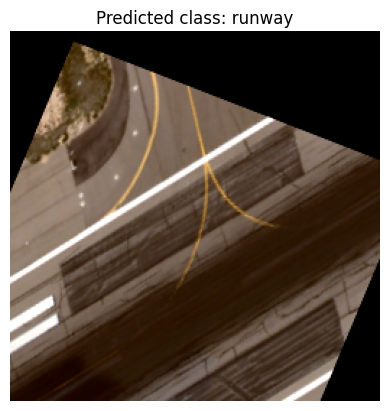

In [ ]:
image_path=root_dir+'/test/runway/runway_000072.png'
predict_land_all(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: golfcourse, Confidence: 0.9936

All Class Labels with Confidences (Descending Order):
golfcourse: 0.9936
baseballdiamond: 0.0040
storagetanks: 0.0013
beach: 0.0010
sparseresidential: 0.0001
river: 0.0000
tenniscourt: 0.0000
mediumresidential: 0.0000
runway: 0.0000
airplane: 0.0000
agricultural: 0.0000
harbor: 0.0000
intersection: 0.0000
mobilehomepark: 0.0000
buildings: 0.0000
forest: 0.0000
freeway: 0.0000
overpass: 0.0000
parkinglot: 0.0000
chaparral: 0.0000
denseresidential: 0.0000


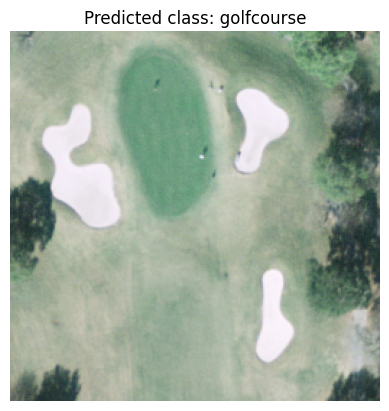

In [ ]:
image_path=root_dir+'/test/golfcourse/golfcourse_000313.png'
predict_land_all(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted class: river, Confidence: 0.9840

All Class Labels with Confidences (Descending Order):
river: 0.9840
golfcourse: 0.0089
forest: 0.0047
beach: 0.0018
baseballdiamond: 0.0001
storagetanks: 0.0001
tenniscourt: 0.0001
sparseresidential: 0.0001
harbor: 0.0001
runway: 0.0000
mediumresidential: 0.0000
intersection: 0.0000
agricultural: 0.0000
chaparral: 0.0000
freeway: 0.0000
denseresidential: 0.0000
mobilehomepark: 0.0000
overpass: 0.0000
buildings: 0.0000
parkinglot: 0.0000
airplane: 0.0000


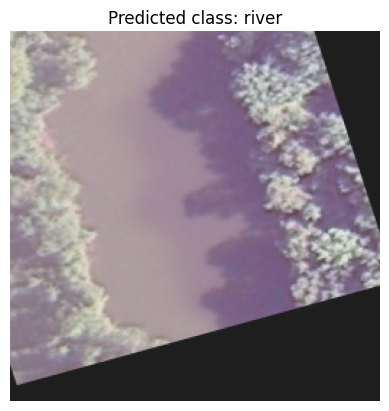

In [ ]:
image_path=root_dir+'/test/river/river_000305.png'
predict_land_all(image_path)

In [ ]:
def predict_random_land_image():
  test_dir = root_dir+'/test'
  img_path, true_label = get_random_image(test_dir)
  print(f"Random Image Path: {img_path}")
  print(f"True Label: {true_label}")
  predict_land_all(img_path)

Random Image Path: /content/drive/My Drive/uc_merced_land_use/images_train_test_val/test/freeway/freeway_000345.png
True Label: freeway
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: freeway, Confidence: 0.9992

All Class Labels with Confidences (Descending Order):
freeway: 0.9992
overpass: 0.0008
intersection: 0.0000
agricultural: 0.0000
runway: 0.0000
storagetanks: 0.0000
river: 0.0000
tenniscourt: 0.0000
buildings: 0.0000
sparseresidential: 0.0000
airplane: 0.0000
baseballdiamond: 0.0000
beach: 0.0000
golfcourse: 0.0000
denseresidential: 0.0000
forest: 0.0000
chaparral: 0.0000
mediumresidential: 0.0000
parkinglot: 0.0000
harbor: 0.0000
mobilehomepark: 0.0000


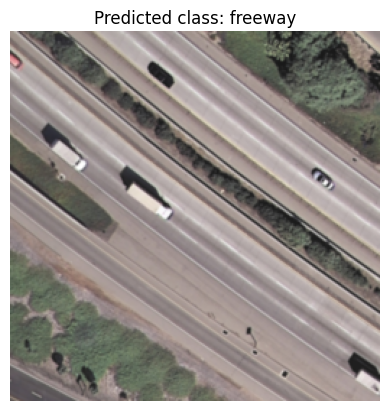

In [ ]:
predict_random_land_image()

Random Image Path: /content/drive/My Drive/uc_merced_land_use/images_train_test_val/test/parkinglot/parkinglot_000142.png
True Label: parkinglot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted class: parkinglot, Confidence: 1.0000

All Class Labels with Confidences (Descending Order):
parkinglot: 1.0000
airplane: 0.0000
harbor: 0.0000
mobilehomepark: 0.0000
buildings: 0.0000
intersection: 0.0000
denseresidential: 0.0000
storagetanks: 0.0000
tenniscourt: 0.0000
golfcourse: 0.0000
sparseresidential: 0.0000
runway: 0.0000
mediumresidential: 0.0000
river: 0.0000
overpass: 0.0000
beach: 0.0000
forest: 0.0000
freeway: 0.0000
chaparral: 0.0000
agricultural: 0.0000
baseballdiamond: 0.0000


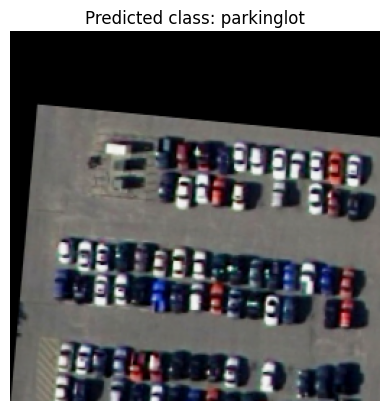

In [ ]:
predict_random_land_image()

Random Image Path: /content/drive/My Drive/uc_merced_land_use/images_train_test_val/test/mobilehomepark/mobilehomepark_000440.png
True Label: mobilehomepark
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: denseresidential, Confidence: 0.4594

All Class Labels with Confidences (Descending Order):
denseresidential: 0.4594
mediumresidential: 0.3218
mobilehomepark: 0.1929
buildings: 0.0133
intersection: 0.0035
storagetanks: 0.0033
tenniscourt: 0.0032
sparseresidential: 0.0022
parkinglot: 0.0003
airplane: 0.0000
harbor: 0.0000
golfcourse: 0.0000
overpass: 0.0000
forest: 0.0000
chaparral: 0.0000
river: 0.0000
agricultural: 0.0000
freeway: 0.0000
runway: 0.0000
baseballdiamond: 0.0000
beach: 0.0000


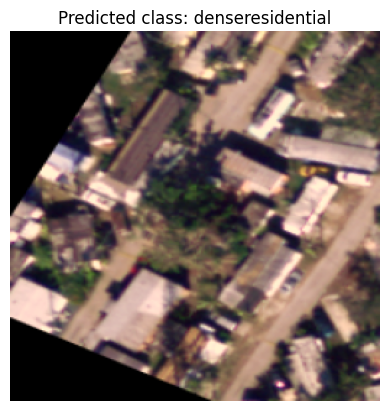

In [ ]:
predict_random_land_image()

Random Image Path: /content/drive/My Drive/uc_merced_land_use/images_train_test_val/test/river/river_000010.png
True Label: river
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: river, Confidence: 0.8024

All Class Labels with Confidences (Descending Order):
river: 0.8024
forest: 0.1707
golfcourse: 0.0121
beach: 0.0054
tenniscourt: 0.0035
sparseresidential: 0.0031
mediumresidential: 0.0012
storagetanks: 0.0007
baseballdiamond: 0.0002
runway: 0.0002
intersection: 0.0002
agricultural: 0.0001
harbor: 0.0001
chaparral: 0.0000
denseresidential: 0.0000
freeway: 0.0000
mobilehomepark: 0.0000
overpass: 0.0000
parkinglot: 0.0000
buildings: 0.0000
airplane: 0.0000


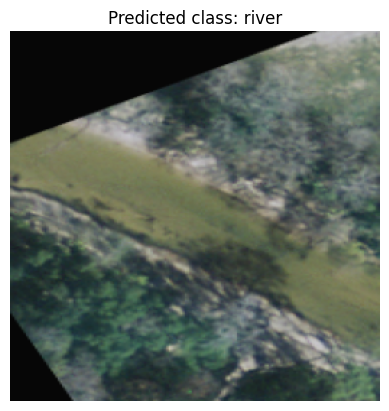

In [ ]:
predict_random_land_image()

Random Image Path: /content/drive/My Drive/uc_merced_land_use/images_train_test_val/test/mediumresidential/mediumresidential_000400.png
True Label: mediumresidential
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: mobilehomepark, Confidence: 0.4292

All Class Labels with Confidences (Descending Order):
mobilehomepark: 0.4292
mediumresidential: 0.3964
denseresidential: 0.0997
storagetanks: 0.0275
intersection: 0.0245
tenniscourt: 0.0102
sparseresidential: 0.0088
buildings: 0.0021
golfcourse: 0.0008
parkinglot: 0.0004
harbor: 0.0003
airplane: 0.0001
overpass: 0.0001
forest: 0.0001
river: 0.0000
agricultural: 0.0000
baseballdiamond: 0.0000
chaparral: 0.0000
freeway: 0.0000
runway: 0.0000
beach: 0.0000


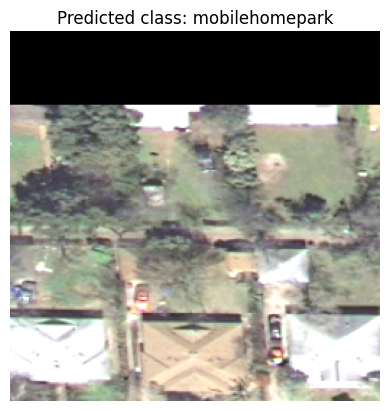

In [ ]:
predict_random_land_image()